In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras.layers
# from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.layers import Normalization
preprocessing = Normalization()
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score, precision_score, recall_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

#from sklearn.datasets import make_regression, make_classification

import matplotlib.pyplot as plt
from keras.models import model_from_json

In [6]:
import random
import os
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

In [ ]:
# ----------------- Step 1: Load CSVs ----------------- #
def load_and_clean_csv(path):
    df = pd.read_csv(path)
    df.drop(columns=['S.No.'], inplace=True, errors='ignore')
    return df.reset_index(drop=True)

bbdata = load_and_clean_csv(b'd:\\New_shared_models\\test_24_july\\iotic-biotic.csv')
abdata = load_and_clean_csv('d:\\New_shared_models\\test_24_july\\abiotic-biotic.csv')
aadata = load_and_clean_csv('d:\\New_shared_models\\test_24_july\\abiotic-abiotic.csv')


In [8]:
bbdata['Salt'].value_counts()

Salt
0    308
Name: count, dtype: int64

In [9]:
abdata['Salt'].value_counts()

Salt
0    175
2      8
1      2
Name: count, dtype: int64

In [10]:
aadata['Salt'].value_counts()

Salt
0      180
2       54
1       10
20       4
50       4
150      3
Name: count, dtype: int64

In [11]:
aadata['Drought'].value_counts()

Drought
0    197
2     54
1      4
Name: count, dtype: int64

In [12]:
abdata['Drought'].value_counts()

Drought
0    161
2     16
1      8
Name: count, dtype: int64

In [13]:
bbdata['Drought'].value_counts()

Drought
0    308
Name: count, dtype: int64

In [14]:
bbdata['Waterlogging'].value_counts()

Waterlogging
No Waterlogging    308
Name: count, dtype: int64

In [15]:
abdata['Waterlogging'].value_counts()

Waterlogging
No waterlogging                      109
Waterlogging 20days post anthesis     36
Waterlogging till maturity            21
Waterlogging for 4 days                6
Waterlogging for 8 days                5
Waterlogging for 3days                 4
Waterlogging for 25 days               4
Name: count, dtype: int64

In [16]:
aadata['Waterlogging'].value_counts()

Waterlogging
0               217
1                17
1 for 5 days     11
1 for 6 days      9
1 for 3 days      1
Name: count, dtype: int64

In [17]:
bbdata['Waterlogging']=0
aadata['Waterlogging']=aadata['Waterlogging'].apply(lambda x: 0 if(x=='No Waterlogging' or x=='No waterlogging') else 1)
abdata['Waterlogging']=abdata['Waterlogging'].apply(lambda x: 0 if(x=='No waterlogging') else 1)

In [18]:
abdata['Nematode'].value_counts()

Nematode
0                           149
Meloidogyne incognita        14
Pratylenchus zeae            10
Meloidogyne  graminicola      4
Meloidogyne graminicola       4
Meloidogyne javanica          2
Pratylenchus penetrans        2
Name: count, dtype: int64

In [19]:
bbdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Stress combination   308 non-null    object 
 1   Plant species        308 non-null    object 
 2   Family               308 non-null    object 
 3   Treatments           308 non-null    object 
 4   Simultaneous         308 non-null    int64  
 5   Sequential           308 non-null    int64  
 6   Plant performance    308 non-null    float64
 7   Average temperature  308 non-null    float64
 8   Parameter            308 non-null    object 
 9   Salt                 308 non-null    int64  
 10  Drought              308 non-null    int64  
 11  Boron                308 non-null    int64  
 12  Cd                   308 non-null    int64  
 13  UV                   308 non-null    int64  
 14  Ozone                308 non-null    int64  
 15  Waterlogging         308 non-null    int

In [20]:
abdata['Weed'].value_counts()

Weed
0                                                      178
Agropyron repens                                         2
Ehinochloa colo0, Cyperus iria and Jussia linifolia      2
Aegilops tauschii                                        2
Sugarbeet Knot grass , White goosefoot                   1
Name: count, dtype: int64

In [21]:
abdata['Simultaneous']=0
abdata.loc[abdata['Sequential']=='','Sequential']=0

aadata['Simultaneous']=0
#aadata.loc[aadata['Sequential']=='','Sequential']=0
aadata['Sequential'].value_counts()

Sequential
0    174
1     81
Name: count, dtype: int64

In [22]:
bbdata['Plant performance']=bbdata['Plant performance'].astype(float)
bbdata['Average temperature']=bbdata['Average temperature'].astype(float)
bbdata['Salt']=bbdata['Salt'].astype(int)
bbdata['Drought']=bbdata['Drought'].astype(int)
bbdata['Boron']=bbdata['Boron'].astype(float)
bbdata['Cd']=bbdata['Cd'].astype(float)
bbdata['UV']=bbdata['UV'].astype(float)
bbdata['Ozone']=bbdata['Ozone'].astype(float)
bbdata['Simultaneous']=bbdata['Simultaneous'].astype(float)
bbdata['Sequential']=bbdata['Sequential'].astype(float)
bbdata['Waterlogging']=bbdata['Waterlogging'].astype(int)

In [23]:
abdata['Plant performance']=abdata['Plant performance'].astype(float)
abdata['Average temperature']=abdata['Average temperature'].astype(float)
abdata['Salt']=abdata['Salt'].astype(int)
abdata['Drought']=abdata['Drought'].astype(int)
abdata['Boron']=abdata['Boron'].astype(float)
abdata['Cd']=abdata['Cd'].astype(float)
abdata['Mn']=abdata['Mn'].astype(int)
abdata['Pb']=abdata['Pb'].astype(int)
abdata['Zinc']=abdata['Zinc'].astype(int)
abdata['Ni']=abdata['Ni'].astype(int)
abdata['UV']=abdata['UV'].astype(float)
abdata['Ozone']=abdata['Ozone'].astype(float)
abdata['Simultaneous']=abdata['Simultaneous'].astype(float)
abdata['Sequential']=abdata['Sequential'].astype(float)
abdata['Waterlogging']=abdata['Waterlogging'].astype(int)

In [24]:
aadata.drop(aadata[aadata['UV']=='UV exposure for 60 min'].index.tolist(),inplace=True)
aadata.drop(aadata[aadata['UV']=='UV B radiation for 30 min'].index.tolist(),inplace=True)
aadata.drop(aadata[aadata['UV']=='UV exposure 30 min/day'].index.tolist(),inplace=True)
aadata.drop(aadata[aadata['UV']=='10-14W/m2'].index.tolist(),inplace=True)
aadata.drop(aadata[aadata['UV']==''].index.tolist(),inplace=True)

In [25]:
aadata['Simultaneous'].value_counts()

Simultaneous
0    241
Name: count, dtype: int64

In [26]:
aadata['Light intensity'].value_counts()

Light intensity
 0    235
 1      4
-1      2
Name: count, dtype: int64

In [27]:
#aadata['Light intensity']=aadata['Light intensity'].apply(lambda x: 1 if(x=='Optimum light') else 0)
aadata['Shade']=aadata['Shade'].apply(lambda x: 0 if(x=='No shade') else 1)

In [28]:
aadata['Shade'].value_counts()

Shade
0    237
1      4
Name: count, dtype: int64

In [29]:
aadata['Plant performance']=aadata['Plant performance'].astype(float)
aadata['Average temperature']=aadata['Average temperature'].astype(float)
aadata['Salt']=aadata['Salt'].astype(int)
aadata['Drought']=aadata['Drought'].astype(int)
aadata['Boron']=aadata['Boron'].astype(float)
aadata['Cd']=aadata['Cd'].astype(float)
aadata['Lead']=aadata['Lead'].astype(float)
# List of invalid UV entries to treat as 0 (as you tried earlier)
invalid_uv = [
    'UV exposure for 60 min',
    'UV B radiation for 30 min',
    'UV exposure 30 min/day',
    '10-14W/m2',
    '',
    np.nan
]

# Clean invalid UV values
aadata['UV'] = aadata['UV'].apply(lambda x: 0 if str(x).strip() in invalid_uv else x)

# Now safely convert to float
aadata['UV'] = aadata['UV'].astype(float)

aadata['UV']=aadata['UV'].astype(float)
aadata['Ozone']=aadata['Ozone'].astype(float)
aadata['Simultaneous']=aadata['Simultaneous'].astype(float)
aadata['Sequential']=aadata['Sequential'].astype(float)
aadata['Waterlogging']=aadata['Waterlogging'].astype(int)

aadata.drop('Treatments',axis=1,inplace=True)

In [30]:
aadata['Plant performance']

0       15.80
1        5.30
2       10.50
3       44.80
4        5.50
        ...  
250     42.00
251     63.00
252     56.70
253     62.88
254    136.08
Name: Plant performance, Length: 241, dtype: float64

In [31]:
bbdata['Oomycete']=bbdata['Oomycete'].apply(lambda x: 0 if(x=='NA') else 1).astype(int)
bbdata['Virus']=bbdata['Virus'].apply(lambda x: 0 if(x=='NA') else 1).astype(int)
bbdata['Insect']=bbdata['Insect'].apply(lambda x: 0 if(x=='NA') else 1).astype(int)
bbdata['Nematode']=bbdata['Nematode'].apply(lambda x: 0 if(x=='NA') else 1).astype(int)
bbdata['Fungus']=bbdata['Fungus'].apply(lambda x: 0 if(x=='NA') else 1).astype(int)
bbdata['Bacteria']=bbdata['Bacteria'].apply(lambda x: 0 if(x=='NA') else 1).astype(int)

bbdata.drop(['Mites','Treatments'],axis=1,inplace=True)

In [32]:
abdata['Weed']=abdata['Weed'].apply(lambda x: 0 if(x=='NA') else 1).astype(int)
abdata['Virus']=abdata['Virus'].apply(lambda x: 0 if(x=='NA') else 1).astype(int)
abdata['Insect']=abdata['Insect'].apply(lambda x: 0 if(x=='NA') else 1).astype(int)
abdata['Nematode']=abdata['Nematode'].apply(lambda x: 0 if(x=='NA') else 1).astype(int)
abdata['Fungus']=abdata['Fungus'].apply(lambda x: 0 if(x=='NA') else 1).astype(int)
abdata['Bacteria']=abdata['Bacteria'].apply(lambda x: 0 if(x=='NA') else 1).astype(int)

abdata.drop('Treatments',axis=1,inplace=True)

In [33]:
df = pd.concat([bbdata, abdata, aadata], ignore_index=True)

Function to create repetitions of rows with +-0.05 variation in plant performance and temperature column

In [34]:
df['Shade'].value_counts()

Shade
0.0    237
1.0      4
Name: count, dtype: int64

In [35]:
df['Light intensity'].value_counts()

Light intensity
 0.0    235
 1.0      4
-1.0      2
Name: count, dtype: int64

In [36]:
df['Light intensity']=df['Light intensity'].apply(lambda x: 1 if (x=='Optimum light') else (-1 if x=='Low light' else 0))

In [37]:
df.fillna(0,inplace=True)

In [38]:
df1=pd.get_dummies(df,columns=['Family','Type'],drop_first=True)
df1.head()

,Stress combination,Plant species,Simultaneous,Sequential,Plant performance,Average temperature,Parameter,Salt,Drought,Boron,...,Family_Linaceae,Family_Malvaceae,Family_Piperaceae,Family_Poaceae,Family_Rosaceae,Family_Solanaceae,Family_Theaceae,Family_Vitaceae,Type_Abiotic-biotic,Type_Biotic-biotic
0,Bacteria and nematode,Potato,0.0,0.0,56.82,18.5,Shoot weight,0,0,30.0,...,False,False,False,False,False,True,False,False,False,True
1,Bacteria and nematode,Tomato,0.0,0.0,8.24,15.0,Shoot weight,0,0,30.0,...,False,False,False,False,False,True,False,False,False,True
2,Virus and bacteria,Potato,0.0,0.0,38.49,18.5,Yield,0,0,30.0,...,False,False,False,False,False,True,False,False,False,True
3,Fungus and Fungus,Wheat,0.0,0.0,40.07,22.5,Yield,0,0,30.0,...,False,False,False,True,False,False,False,False,False,True
4,Fungus and Fungus,Wheat,0.0,1.0,20.16,22.5,Yield,0,0,30.0,...,False,False,False,True,False,False,False,False,False,True


In [39]:
df1

,Stress combination,Plant species,Simultaneous,Sequential,Plant performance,Average temperature,Parameter,Salt,Drought,Boron,...,Family_Linaceae,Family_Malvaceae,Family_Piperaceae,Family_Poaceae,Family_Rosaceae,Family_Solanaceae,Family_Theaceae,Family_Vitaceae,Type_Abiotic-biotic,Type_Biotic-biotic
0,Bacteria and nematode,Potato,0.0,0.0,56.82,18.5,Shoot weight,0,0,30.0,...,False,False,False,False,False,True,False,False,False,True
1,Bacteria and nematode,Tomato,0.0,0.0,8.24,15.0,Shoot weight,0,0,30.0,...,False,False,False,False,False,True,False,False,False,True
2,Virus and bacteria,Potato,0.0,0.0,38.49,18.5,Yield,0,0,30.0,...,False,False,False,False,False,True,False,False,False,True
3,Fungus and Fungus,Wheat,0.0,0.0,40.07,22.5,Yield,0,0,30.0,...,False,False,False,True,False,False,False,False,False,True
4,Fungus and Fungus,Wheat,0.0,1.0,20.16,22.5,Yield,0,0,30.0,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,Drought and heat,Rice,0.0,0.0,42.00,38.0,Grain yield,0,0,30.0,...,False,False,False,True,False,False,False,False,False,False
730,Drought and heat,Rice,0.0,1.0,63.00,38.0,Grain yield,0,2,30.0,...,False,False,False,True,False,False,False,False,False,False
731,Drought and heat,Rice,0.0,0.0,56.70,33.0,Grain yield,0,2,30.0,...,False,False,False,True,False,False,False,False,False,False
732,Drought and heat,Rice,0.0,0.0,62.88,38.0,Grain yield,0,0,30.0,...,False,False,False,True,False,False,False,False,False,False


In [40]:
df1.drop(['Stress combination','Plant species'],axis=1,inplace=True)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Simultaneous            734 non-null    float64
 1   Sequential              734 non-null    float64
 2   Plant performance       734 non-null    float64
 3   Average temperature     734 non-null    float64
 4   Parameter               734 non-null    object 
 5   Salt                    734 non-null    int32  
 6   Drought                 734 non-null    int32  
 7   Boron                   734 non-null    float64
 8   Cd                      734 non-null    float64
 9   UV                      734 non-null    float64
 10  Ozone                   734 non-null    float64
 11  Waterlogging            734 non-null    int32  
 12  Bacteria                734 non-null    float64
 13  Fungus                  734 non-null    float64
 14  Oomycete                734 non-null    fl

In [41]:
df1.Parameter.value_counts().count()

51

In [42]:
df1=df1[df1['Parameter']!='Harvest Index']

In [43]:
p=pd.read_csv('param_PG.csv')
p.head(10)

,Parameter,Count,New
0,Shoot weight,1507,Biomass
1,Yield,1386,Yield
2,Plant height,495,Plant growth
3,Biomass,330,Biomass
4,Total plant weight,297,Biomass
5,Shoot dry weight,297,Biomass
6,Biomass,275,Biomass
7,Root length,242,Plant growth
8,Leaf area,231,Plant growth
9,Dry weight,198,Biomass


In [44]:
p.Count.sum()

7293

In [45]:
p.Parameter.value_counts().count()

50

In [46]:
set(df1.Parameter.unique())-set(p.Parameter.unique())

{'Biomass ', 'Grain yield ', 'Root dry mass', 'Seed yield/plant'}

In [47]:
p.New.value_counts()

New
Yield           18
Biomass         17
Plant growth    17
Name: count, dtype: int64

In [48]:
df1.loc[df1['Parameter']=='Biomass ','Parameter']='Biomass'
df1.loc[df1['Parameter']=='Root dry mass','Parameter']='Root dry weight'
df1.loc[df1['Parameter']=='root dry mass','Parameter']='Root dry weight'
df1.loc[df1['Parameter']=='Seed yield/plant','Parameter']='Seed yield'
df1.loc[df1['Parameter']=='Grain yield ','Parameter']='Grain yield'

In [49]:
p.iloc[6:]

,Parameter,Count,New
6,Biomass,275,Biomass
7,Root length,242,Plant growth
8,Leaf area,231,Plant growth
9,Dry weight,198,Biomass
10,Root dry weight,165,Biomass
11,Total dry weight,99,Biomass
12,Mean tuber weight,99,Yield
13,Fresh weight,99,Biomass
14,Grain yield,99,Yield
15,Weight per grain,99,Yield


In [50]:
df1=df1.merge(p,left_on='Parameter',right_on='Parameter',how='left')
#df1.drop(['Count','Unnamed: 3','Parameter','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8'],axis=1,inplace=True)

In [ ]:
df1 = df1[df1["New"] != "Plant growth"]

In [52]:
(df1["New"] == "Plant growth").sum()

0

In [53]:
df1.drop(['Count','Parameter'],axis=1,inplace=True)

#df1.drop('Parameter',axis=1,inplace=True)
df1=df1.rename(columns={'New':'Parameter'})
df1.shape

(654, 47)

In [86]:
df1.to_csv("d:\\New_shared_models\\test_24_july\\Input\\Combined_Input.csv")

In [54]:
df1.Parameter.value_counts()

Parameter
Biomass    413
Yield      241
Name: count, dtype: int64

<Axes: >

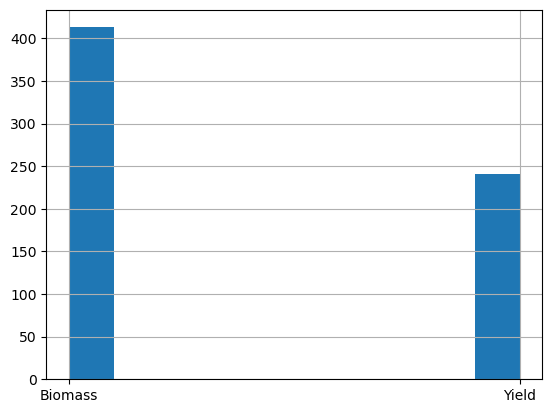

In [55]:
df1.Parameter.hist()

In [56]:
df1['Plant performance'].describe()

count    654.000000
mean      28.918899
std       31.990521
min     -112.500000
25%       10.232500
50%       27.100000
75%       48.165000
max      268.800000
Name: Plant performance, dtype: float64

<Axes: >

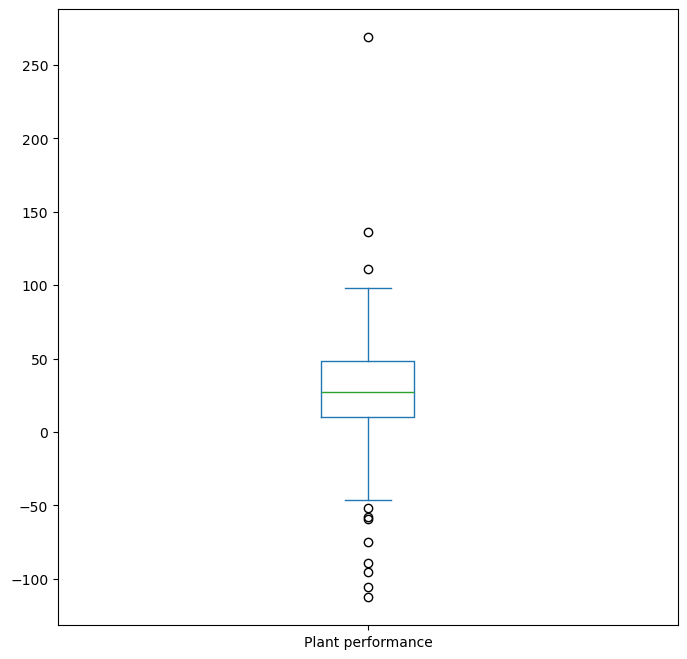

In [57]:
df1['Plant performance'].plot(kind='box',figsize=(8,8))

<Axes: >

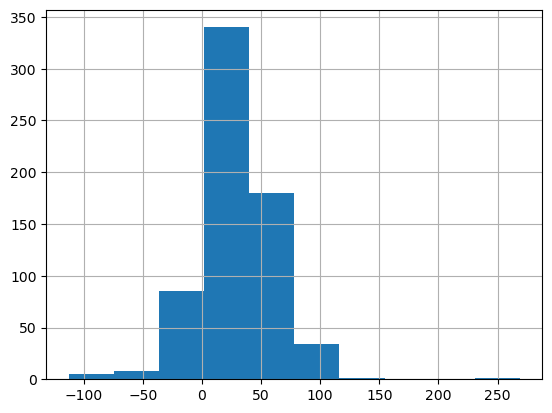

In [58]:
df1['Plant performance'].hist()

In [59]:
# df1.to_csv('filename.csv', index=False)

In [60]:
# Define features and target
X = df1.drop(['Plant performance', 'Parameter'], axis=1)
y = df1[['Plant performance', 'Parameter']].copy()

# Split the dataset first (no encoding yet)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y['Parameter'], random_state=42,test_size=0.2
)

# Apply Label Encoding **only to y_train and y_test**
# le = LabelEncoder()

# y_train['Parameter'] = le.fit_transform(y_train['Parameter'])
# y_test['Parameter'] = le.transform(y_test['Parameter'])  # use transform only!

In [ ]:
X_test.to_csv("d:\\New_shared_models\\test_24_july\\Input\\X_test_without_augmentatio.csv")
y_test.to_csv("d:\\New_shared_models\\test_24_july\\Input\\y_test_without_augmentatio.csv")

In [62]:
print(X_train.columns)

Index(['Simultaneous', 'Sequential', 'Average temperature', 'Salt', 'Drought',
       'Boron', 'Cd', 'UV', 'Ozone', 'Waterlogging', 'Bacteria', 'Fungus',
       'Oomycete', 'Virus', 'Nematode', 'Insect', 'Mn', 'Pb', 'Zinc', 'Ni',
       'Weed', 'Light intensity', 'Shade', 'Lead', 'Family_Aizoaceae',
       'Family_Amaranthaceae', 'Family_Araliaceae', 'Family_Asteraceae',
       'Family_Brassicaceae', 'Family_Caricaceae', 'Family_Caryophyllaceae',
       'Family_Cucurbitaceae', 'Family_Euphorbiaceae', 'Family_Fabaceae',
       'Family_Lamiaceae', 'Family_Linaceae', 'Family_Malvaceae',
       'Family_Piperaceae', 'Family_Poaceae', 'Family_Rosaceae',
       'Family_Solanaceae', 'Family_Theaceae', 'Family_Vitaceae',
       'Type_Abiotic-biotic', 'Type_Biotic-biotic'],
      dtype='object')


In [63]:
# Augmentation function
def repetition(X_train, y_train):
    X_aug = X_train.copy()
    y_aug = y_train.copy()

    for idx in X_train.index:
        row_X = X_train.loc[idx].copy()
        row_y = y_train.loc[idx].copy()
        plant_perf = row_y['Plant performance']
        avg_temp = row_X['Average temperature']

        # Skip rows with missing values in required columns
        if pd.isna(plant_perf) or pd.isna(avg_temp):
            continue

        for j in range(1, 6):
            new_row_X = row_X.copy()
            new_row_y = row_y.copy()
            new_row_X['Average temperature'] = avg_temp - j * 0.05
            new_row_y['Plant performance'] = plant_perf - j * 0.05

            X_aug = pd.concat([X_aug, new_row_X.to_frame().T], ignore_index=True)
            y_aug = pd.concat([y_aug, new_row_y.to_frame().T], ignore_index=True)

    return X_aug, y_aug

# Apply augmentation
X_train_aug, y_train_aug = repetition(X_train, y_train)
from sklearn.preprocessing import MinMaxScaler
# Normalize Plant performance
scaler = MinMaxScaler()
y_train_aug['Plant performance'] = scaler.fit_transform(y_train_aug[['Plant performance']])
y_test['Plant performance'] = scaler.transform(y_test[['Plant performance']])

# Normalization layer for input features
normalizer = Normalization(axis=-1)
normalizer.adapt(np.array(X_train_aug))


  

In [64]:
y_train

,Plant performance,Parameter
278,-9.50,Yield
232,17.00,Biomass
365,28.20,Yield
475,86.70,Yield
298,71.00,Biomass
...,...,...
568,97.50,Yield
686,51.00,Yield
511,40.93,Yield
446,16.80,Biomass


In [65]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.layers import Normalization

# # Augmentation with class balancing
# def repetition_balanced(X_train, y_train, class_col, target_col):
#     X_aug = X_train.copy()
#     y_aug = y_train.copy()

#     # Find maximum samples among classes
#     class_counts = y_train[class_col].value_counts()
#     max_count = class_counts.max()

#     for cls in class_counts.index:
#         # Get all rows for this class
#         X_class = X_train[y_train[class_col] == cls]
#         y_class = y_train[y_train[class_col] == cls]

#         # How many more samples needed to match max_count
#         needed = max_count - len(X_class)

#         if needed > 0:
#             reps = needed // len(X_class) + 1
#             for _ in range(reps):
#                 for idx in X_class.index:
#                     if len(y_aug[y_aug[class_col] == cls]) >= max_count:
#                         break
                    
#                     row_X = X_class.loc[idx].copy()
#                     row_y = y_class.loc[idx].copy()
#                     plant_perf = row_y[target_col]
#                     avg_temp = row_X['Average temperature']

#                     if pd.isna(plant_perf) or pd.isna(avg_temp):
#                         continue

#                     # Small variation to avoid exact duplicates
#                     noise_factor = np.random.uniform(-0.05, 0.05)
#                     new_row_X = row_X.copy()
#                     new_row_y = row_y.copy()
#                     new_row_X['Average temperature'] = avg_temp + noise_factor
#                     new_row_y[target_col] = plant_perf + noise_factor

#                     X_aug = pd.concat([X_aug, new_row_X.to_frame().T], ignore_index=True)
#                     y_aug = pd.concat([y_aug, new_row_y.to_frame().T], ignore_index=True)

#     return X_aug, y_aug

# # Example usage:
# # 'Class' is the classification column, 'Plant performance' is continuous target
# X_train_aug, y_train_aug = repetition_balanced(
#     X_train, 
#     y_train, 
#     class_col='Parameter', 
#     target_col='Plant performance'
# )


In [66]:
X_train = X_train_aug
y_train = y_train_aug

In [88]:
X_train.to_csv("d:\\New_shared_models\\test_24_july\\Input\\X_train_augmented.csv")
y_train.to_csv("d:\\New_shared_models\\test_24_july\\Input\\y_train_augmented.csv")


In [67]:


# minmax=MinMaxScaler()
# y_train['Plant performance']=minmax.fit_transform(np.array(y_train['Plant performance']).reshape(-1,1))
# y_test['Plant performance']=minmax.transform(np.array(y_test['Plant performance']).reshape(-1,1))

In [68]:
X_train.describe().transpose().join(X_test.describe().transpose(),lsuffix='_x_train',rsuffix='_x_test')

,count_x_train,unique,top,freq,count_x_test,mean,std,min,25%,50%,75%,max
Simultaneous,3138.0,2.0,0.0,2946.0,131.0,0.045802,0.209857,0.00,0.0,0.0,0.0,1.0
Sequential,3138.0,2.0,0.0,2160.0,131.0,0.358779,0.481483,0.00,0.0,0.0,1.0,1.0
Average temperature,3138.0,228.0,22.25,84.0,131.0,22.408397,5.106482,13.50,18.5,22.5,25.0,38.0
Salt,3138,6,0,2856,131.0,2.572519,18.514872,0.00,0.0,0.0,0.0,150.0
Drought,3138,3,0,2814,131.0,0.175573,0.533218,0.00,0.0,0.0,0.0,2.0
Boron,3138.0,1.0,30.0,3138.0,131.0,29.775725,2.566943,0.62,30.0,30.0,30.0,30.0
Cd,3138.0,5.0,0.0,3054.0,131.0,0.395649,4.370216,0.00,0.0,0.0,0.0,50.0
UV,3138.0,7.0,1.0,3018.0,131.0,1.269695,1.572418,0.00,1.0,1.0,1.0,11.2
Ozone,3138.0,10.0,0.0,3018.0,131.0,2.977099,16.626885,0.00,0.0,0.0,0.0,110.0
Waterlogging,3138,2,0,2076,131.0,0.335878,0.474109,0.00,0.0,0.0,1.0,1.0


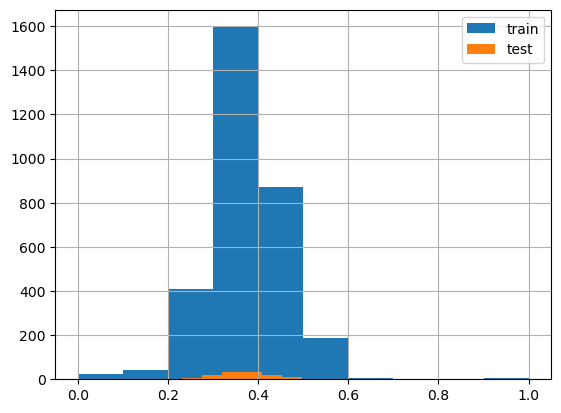

In [69]:
ax=y_train['Plant performance'].hist(label='train')
y_test['Plant performance'].hist(label='test',ax=ax)
plt.legend()

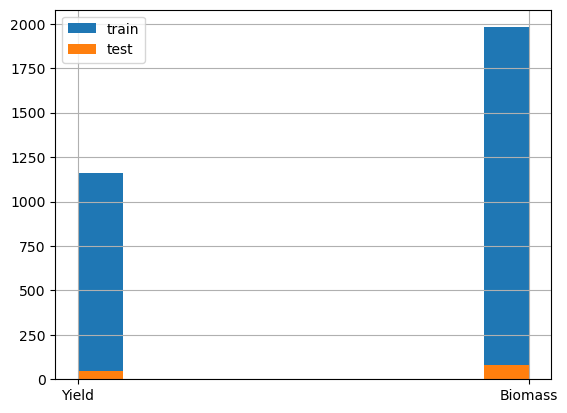

In [70]:
ax=y_train['Parameter'].hist(label='train')
y_test['Parameter'].hist(label='test',ax=ax)
plt.legend()

In [71]:
# from tensorflow.keras.layers import Normalization
# normalizer =Normalization(axis=-1)
# normalizer.adapt(np.array(X_train))

In [72]:
X_train.shape,X_test.shape

((3138, 45), (131, 45))

In [73]:
y_train.shape,y_test.shape

((3138, 2), (131, 2))

In [74]:
y_train['Parameter'].value_counts()

Parameter
Biomass    1980
Yield      1158
Name: count, dtype: int64

### Train set

Training with different weights for regression and classification

In [ ]:
#####FINAL################
import os
import joblib
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from sklearn.metrics import (
    precision_score,
    recall_score,
    accuracy_score,
    r2_score,
    mean_squared_error,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# ========================
# SETUP
# ========================
os.makedirs("best_models", exist_ok=True)
os.makedirs("confusion_matrices/train", exist_ok=True)
os.makedirs("confusion_matrices/test", exist_ok=True)
os.makedirs("encoders", exist_ok=True)

# ------------------------
# ASSUMPTION:
# X_train, X_test, y_train, y_test are already defined in the environment
# ------------------------

# ========================
# LABEL ENCODING
# ========================
y_train = y_train.copy()
le = LabelEncoder()
y_train['Parameter_enc'] = le.fit_transform(y_train['Parameter'])
joblib.dump(le, "encoders/label_encoder.pkl")

n_classes = len(le.classes_)

X_train_np = X_train.values.astype(np.float32)
y_reg = y_train['Plant performance'].values.astype(np.float32)
y_class = y_train['Parameter_enc'].values.astype(np.int32)

X_test_np = X_test.values.astype(np.float32)
y_test_reg = y_test['Plant performance'].values.astype(np.float32)
y_test_class = le.transform(y_test['Parameter']).astype(np.int32)

# ========================
# NORMALIZATION LAYER
# ========================
normalizer = keras.layers.Normalization(axis=-1, name="normalizer")
normalizer.adapt(X_train_np)
joblib.dump(normalizer.get_weights(), "encoders/normalizer_weights.pkl")

# ========================
# MODEL BUILDER
# ========================
def get_model(input_dim, activation):
    input_layer = keras.Input(shape=(input_dim,), name="input_layer")
    x = normalizer(input_layer)
    x = keras.layers.Dense(128, activation=activation)(x)
    x = keras.layers.Dropout(0.3)(x)
    x = keras.layers.Dense(64, activation=activation)(x)
    x = keras.layers.Dropout(0.2)(x)
    x = keras.layers.Dense(32, activation=activation)(x)
    x = keras.layers.Dense(32, activation=activation)(x)

    regression_output = keras.layers.Dense(1, activation='linear', name='regression_output')(x)
    classification_output = keras.layers.Dense(n_classes, activation='softmax', name='classification_output')(x)
    return keras.Model(inputs=input_layer, outputs=[regression_output, classification_output])

# ========================
# PREDICTION & EVALUATION
# ========================
def evaluate_and_save_cm(y_true_reg, y_pred_reg, y_true_class, y_pred_class, label_encoder, save_path, title):
    precision = precision_score(y_true_class, y_pred_class, average='weighted', zero_division=0)
    recall = recall_score(y_true_class, y_pred_class, average='weighted', zero_division=0)
    accuracy = accuracy_score(y_true_class, y_pred_class)
    r2 = r2_score(y_true_reg, y_pred_reg)
    rmse = np.sqrt(mean_squared_error(y_true_reg, y_pred_reg))

    cm = confusion_matrix(y_true_class, y_pred_class, normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()

    return precision, recall, accuracy, r2, rmse

# ========================
# TRAINING LOOP
# ========================
activations = ['relu', 'elu', 'tanh', 'selu']
loss_weights_list = [
    {'regression_output': 1.0, 'classification_output': 100.0},
    {'regression_output': 1.0, 'classification_output': 50.0},
    {'regression_output': 1.0, 'classification_output': 10.0},
    {'regression_output': 1.0, 'classification_output': 1.0},
    {'regression_output': 10.0, 'classification_output': 1.0},
    {'regression_output': 50.0, 'classification_output': 1.0},
    {'regression_output': 100.0, 'classification_output': 1.0},
]

train_results = []
test_results = []

global_best_rmse = float('inf')
global_best_model_path = "best_models/global_best_model.keras"

for activation in activations:
    best_rmse_train = float('inf')
    best_loss_weights_for_activation = None
    best_model_path = f"best_models/{activation}_best_model.keras"

    # Compute class weights for classification head using training labels
    cw = class_weight.compute_class_weight('balanced', classes=np.arange(n_classes), y=y_class)
    class_weight_dict = {i: float(w) for i, w in enumerate(cw)}

    for lw in loss_weights_list:
        print(f"\nTraining with activation={activation}, loss_weights={lw}")
        model = get_model(X_train_np.shape[1], activation)
        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=0.003),
            loss={
                'regression_output': keras.losses.MeanSquaredError(),
                'classification_output': keras.losses.SparseCategoricalCrossentropy()
            },
            loss_weights=lw,
            metrics={
                'regression_output': [keras.metrics.MeanAbsoluteError()],
                'classification_output': [keras.metrics.SparseCategoricalAccuracy()]
            }
        )

        callbacks = [
            keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        ]

        y_dict = {'regression_output': y_reg, 'classification_output': y_class}

        # Prepare sample weights per output (None for regression, class weights for classification)
        sample_weight_for_fit = {
            'regression_output': np.ones_like(y_reg, dtype=np.float32),
            'classification_output': np.array([class_weight_dict[c] for c in y_class], dtype=np.float32)
        }

        history = model.fit(
            X_train_np,
            y_dict,
            epochs=100,
            batch_size=50,
            verbose=1,
            validation_split=0.1,
            callbacks=callbacks,
            sample_weight=sample_weight_for_fit
        )

        # Predictions on train set
        train_preds = model.predict(X_train_np, verbose=0)
        train_pred_reg = train_preds[0].flatten()
        train_pred_class = np.argmax(train_preds[1], axis=1)

        precision, recall, accuracy, r2, rmse = evaluate_and_save_cm(
            y_reg, train_pred_reg, y_class, train_pred_class, le,
            f"confusion_matrices/train/cm_{activation}.png",
            f"Train Confusion Matrix - {activation}"
        )

        train_results.append({
            'activation': activation,
            'loss_weights': str(lw),
            'precision': precision,
            'recall': recall,
            'accuracy': accuracy,
            'r2': r2,
            'rmse': float(rmse)
        })

        if rmse < best_rmse_train:
            best_rmse_train = rmse
            best_loss_weights_for_activation = lw
            model.save(best_model_path)

    # ========================
    # TEST EVALUATION FOR BEST MODEL OF THIS ACTIVATION
    # ========================
    print(f"\nTesting best model for activation={activation}")
    best_model = keras.models.load_model(best_model_path)

    test_preds = best_model.predict(X_test_np, verbose=0)
    test_pred_reg = test_preds[0].flatten()
    test_pred_class = np.argmax(test_preds[1], axis=1)

    precision_t, recall_t, accuracy_t, r2_t, rmse_t = evaluate_and_save_cm(
        y_test_reg, test_pred_reg, y_test_class, test_pred_class, le,
        f"confusion_matrices/test/cm_{activation}.png",
        f"Test Confusion Matrix - {activation}"
    )

    test_results.append({
        'activation': activation,
        'loss_weights': str(best_loss_weights_for_activation),
        'precision': precision_t,
        'recall': recall_t,
        'accuracy': accuracy_t,
        'r2': r2_t,
        'rmse': float(rmse_t)
    })

    if rmse_t < global_best_rmse:
        global_best_rmse = rmse_t
        best_model.save(global_best_model_path)

# ========================
# SAVE METRICS
# ========================
pd.DataFrame(train_results).to_excel("train_evaluation_metrics.xlsx", index=False)
pd.DataFrame(test_results).to_excel("test_evaluation_metrics.xlsx", index=False)

print("\n✅ All models trained, tested, and saved.")
print(f"🏆 Global best model saved at: {global_best_model_path}")



Training with activation=relu, loss_weights={'regression_output': 1.0, 'classification_output': 100.0}
Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - classification_output_sparse_categorical_accuracy: 0.6254 - loss: 62.1140 - regression_output_mean_absolute_error: 0.2665 - val_classification_output_sparse_categorical_accuracy: 0.6975 - val_loss: 50.3453 - val_regression_output_mean_absolute_error: 0.1288
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - classification_output_sparse_categorical_accuracy: 0.7151 - loss: 50.6302 - regression_output_mean_absolute_error: 0.1557 - val_classification_output_sparse_categorical_accuracy: 0.7134 - val_loss: 48.0436 - val_regression_output_mean_absolute_error: 0.1200
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - classification_output_sparse_categorical_accuracy: 0.7238 - loss: 48.2789 - regression_output_mean_absolute_error: 0.1447 - val_classification_output_sparse_categorical_accuracy: 0.7452 - val_loss: 44.3944 - val_regressio

In [94]:
#TrainOutput

df_train = pd.DataFrame()
plant_performance_preds_train = train_preds[0].flatten()
class_preds_indices_train = np.argmax(train_preds[1], axis=1)
class_preds_labels_train = le.inverse_transform(class_preds_indices_train)
 # Append predictions to dataframe
df_train['Predicted_Plant_Performance_train'] = plant_performance_preds_train
df_train['Predicted_Parameter_train'] = class_preds_labels_train
df_train.to_csv("d:\\New_shared_models\\test_24_july\\Input\\Train_output.csv")

In [95]:
#Test Output
df_test = pd.DataFrame()
plant_performance_preds = test_preds[0].flatten()
class_preds_indices = np.argmax(test_preds[1], axis=1)
class_preds_labels = le.inverse_transform(class_preds_indices)
 # Append predictions to dataframe
df_test['Predicted_Plant_Performance'] = plant_performance_preds
df_test['Predicted_Parameter'] = class_preds_labels
df_test.to_csv("d:\\New_shared_models\\test_24_july\\Input\\Test_output.csv")

In [84]:
print(le.classes_)


['Biomass' 'Yield']


In [81]:
!pip freeze > requirements.txt
